Your calculation for generating wins is running.
These are your suggested balls :with tally [{46: 27}, {35: 28}, {34: 29}, {51: 29}, {4: 31}, {65: 31}]
These are your suggested power balls: with tally [{16: 14}, {1: 17}, {7: 17}, {12: 17}, {15: 17}, {17: 17}]
Your average tally for Match 5 is:  39.492753623188406
Your average tally for powerball is:  20.96153846153846


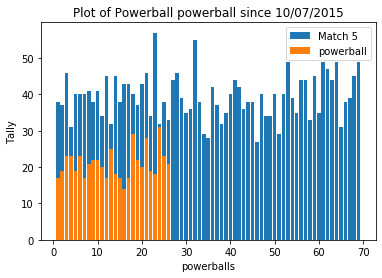

In [1]:
# Choose the lottery numbers
# lottery.py by Ronald Adomako July 7, 2016

from itertools import combinations
import string
import timeit
start_time = timeit.default_timer()
import matplotlib.pyplot as plt
%matplotlib inline

class lotteryDatabase:
    def __init__(self):       
        self.histBallCount = [0]*69
        self.histPowerballCount = [0]*26
        self.pool = list(combinations(list(range(1,70)),5))
        self.optPool = [] #suggested main draws
        self.optPowerball = [0]*26 #suggested powerballs
        self.played = []#pool of played tickets
         
    def genHistDraw(self, draws):
        
        for line in draws:
            line = line.strip()
            date, *nums = line.split() #python 3
            
            powerball = int(nums[5])#tally powerball 1 through 26
            self.histPowerballCount[powerball-1]+=1
            
            for i in range(5):
                ball = int(nums[i])
                self.histBallCount[ball-1]+=1 #tally balls since 10/07/2015      
        return

    def pickPowerball(self):
            
        tally = [ pb for pb in self.histPowerballCount ]
        minPowerball = []
        minPBCount = []
        for index in range(26):       
            ballCount = min(tally)
            minPBCount.append(ballCount)
            minPowerball.append({tally.index(ballCount)+1: ballCount})
            tally[tally.index(ballCount)] = 1000 #place holder assuming each tally <1000 to not count again
        picks = 3
        self.optPowerball = minPowerball[:picks]
        while (len(self.optPowerball) < 27 and minPBCount[picks-1] == minPBCount[picks]):
            picks+=1
            self.optPowerball = minPowerball[:picks]
        return self.optPowerball

    def pickDrawing(self):#tally of least 5 picked balls
        tally = [ wb for wb in self.histBallCount ]
        minDraws = []
        for count in range(69):
            minTally = min(tally)
            ball = tally.index(minTally)+1 #ball draw corresponding to count
            d=dict()
            d[ball]= minTally
            minDraws.append(d)
            tally[ball-1]=1000 #place holder for indices for all tallies <1000
        picks = 5
        self.optPool = minDraws[:picks]
        while minDraws[picks][list(minDraws[picks].keys())[0]] == minDraws[picks-1][list(minDraws[picks-1].keys())[0]]:
            picks+=1
            self.optPool = minDraws[:picks]
            if picks == 70:#in the case that all the balls are uniform
                break
        return self.optPool
    
    def plotCounts(self):
        #print(self.histBallCount)
        #print(max(self.histPowerballCount),self.histPowerballCount.index(max(self.histPowerballCount))+1)
        plt.bar(range(1,70), self.histBallCount, label='Match 5')
        plt.title('Plot of Powerball since 10/07/2015')
        plt.xlabel('White Balls')  
        plt.ylabel('Tally')
        plt.bar(range(1,27), self.histPowerballCount, label='powerball')
        plt.title('Plot of Powerball powerball since 10/07/2015')
        plt.xlabel('powerballs')  
        plt.legend()
        print('Your average tally for Match 5 is: ',sum(self.histBallCount) / len(self.histBallCount))
        print('Your average tally for powerball is: ',sum(self.histPowerballCount) / len(self.histPowerballCount))
        return

def main():
    print('Your calculation for generating wins is running.')
    lottery = lotteryDatabase()
    tally = open('powerball.txt','r')
    lottery.genHistDraw(tally)
    print ('These are your suggested balls :with tally', lottery.pickDrawing())
    print ('These are your suggested power balls: with tally', lottery.pickPowerball())
    draws = open('tickets.txt','r')
    lottery.plotCounts()
'''
if __name__ == 'main':
'''
main()#indent when using command line


    #history = input(lottery.txt)
    #work out length of time to finish running
    #work out writing file to check algorithm (! in shell)




# Highest chosen balls are 23 followed by 32. Histogram shows that more or less the balls are chosen at random given uniform shape as you approach infinite samples.

# Highest chosen powerballs is 24.